In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv


In [2]:
df=pd.read_csv('/kaggle/input/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.set_index('EmployeeNumber',inplace=True)

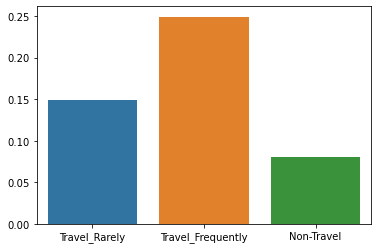

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
h=[]
for x in df['BusinessTravel'].unique():
    h.append(len(df[(df['BusinessTravel']==x) & (df['Attrition']=='Yes')])/len(df[df['BusinessTravel']==x]))
sns.barplot(x=df['BusinessTravel'].unique(),y=h)

**Perecentage of attrition based on frequency of business travel.One reason behind the high amount of attrition of employees who travel frequently could be that they meet people from different companies more often and have more chances of maybe getting a job offer.**

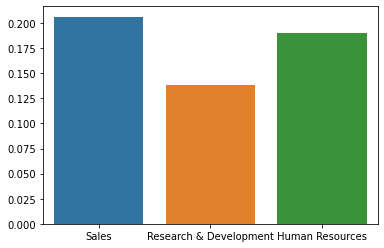

In [4]:
h=[]
for x in df['Department'].unique():
    h.append(len(df[(df['Department']==x) & (df['Attrition']=='Yes')])/len(df[df['Department']==x]))
sns.barplot(x=df['Department'].unique(),y=h)
df['Attrition'].replace({'Yes':1,'No':0},inplace=True)

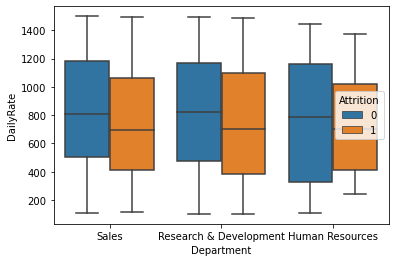

In [5]:
sns.boxplot(x='Department',y='DailyRate',data=df,hue='Attrition')

**It is clear that in each department those who attrition have a lower dailyrate as compared to those who don't attrition.**

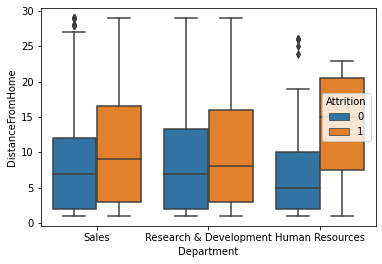

In [6]:
sns.boxplot(x='Department',y='DistanceFromHome',data=df,hue='Attrition')

**People who live farther away from their workplace tend to change jobs to a much closer location.However their are some outliers which show that inspite of the workplace being far from their home they tend to stay at their jobs.The Reason behind this could be that they are either new employess,have a good daily rate , are too old to find a new job or have recently gained a promotion. **

In [7]:
df[(df['DistanceFromHome']>25) &(df['Attrition']==0)]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,
13,36,0,Travel_Rarely,1299,Research & Development,27,3,Medical,1,3,...,2,80,2,17,3,2,7,7,7,7
16,31,0,Travel_Rarely,670,Research & Development,26,1,Life Sciences,1,1,...,4,80,1,5,1,2,5,2,4,3
79,38,0,Travel_Frequently,653,Research & Development,29,5,Life Sciences,1,4,...,4,80,0,10,2,3,10,3,9,9
148,54,0,Non-Travel,142,Human Resources,26,3,Human Resources,1,4,...,3,80,0,23,3,3,5,3,4,4
158,43,0,Travel_Frequently,394,Sales,26,2,Life Sciences,1,3,...,4,80,2,25,3,4,25,12,4,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019,52,0,Non-Travel,585,Sales,29,4,Life Sciences,1,1,...,2,80,2,16,3,2,9,8,0,0
2034,41,0,Travel_Rarely,582,Research & Development,28,4,Life Sciences,1,1,...,3,80,1,21,3,3,20,7,0,10
2035,34,0,Travel_Rarely,704,Sales,28,3,Marketing,1,4,...,4,80,2,8,2,3,8,7,1,7


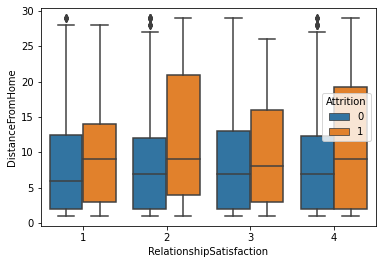

In [8]:
df
sns.boxplot(x='RelationshipSatisfaction',y='DistanceFromHome',data=df,hue='Attrition')

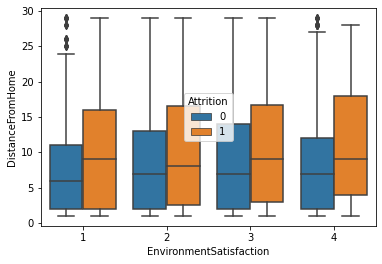

In [9]:
sns.boxplot(x='EnvironmentSatisfaction',y='DistanceFromHome',data=df,hue='Attrition')

**Even though the employee might be very satisfied and have a good relationship in the company but if he lives far away there's no stopping him/her from leaving.**

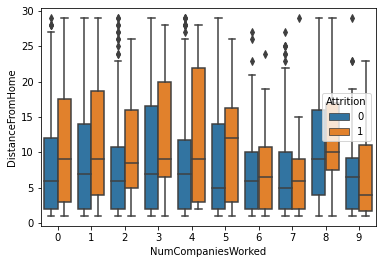

In [10]:
sns.boxplot(x='NumCompaniesWorked',y='DistanceFromHome',data=df,hue='Attrition')

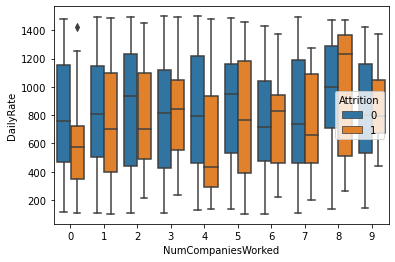

In [11]:
sns.boxplot(x='NumCompaniesWorked',y='DailyRate',data=df,hue='Attrition')

If you are at a newer job and on the young side and if it just the 1st or the 2nd company you're working in your more likely to change jobs if the workplace is far as compared to people who have already worked at 7 or 8 companies.Also, if it is your 1st job and you get an offeer which is only marginally better you're more likely to switch.

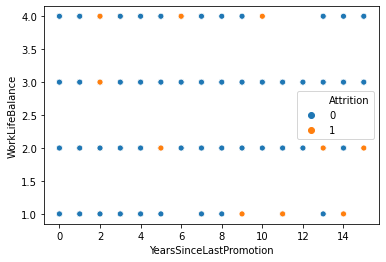

In [12]:
sns.scatterplot(y='WorkLifeBalance',x='YearsSinceLastPromotion',data=df,hue='Attrition')

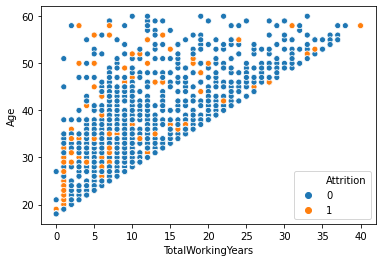

In [13]:
sns.scatterplot(y='Age',x='TotalWorkingYears',data=df,hue='Attrition')

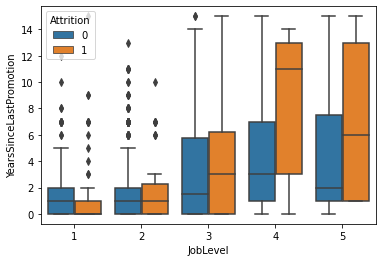

In [14]:
sns.boxplot(x='JobLevel',y='YearsSinceLastPromotion',data=df,hue='Attrition')

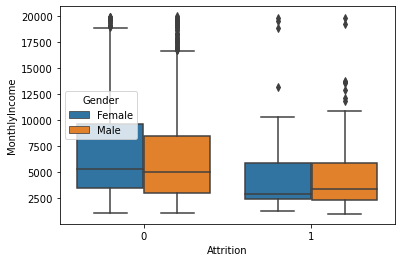

In [15]:
sns.boxplot(hue='Gender',y='MonthlyIncome',data=df,x='Attrition')

In [16]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [17]:
df.drop(['Education','NumCompaniesWorked','BusinessTravel','EnvironmentSatisfaction','JobInvolvement','JobSatisfaction','EducationField','JobRole','Over18','OverTime','StandardHours','YearsWithCurrManager','HourlyRate','EmployeeCount','MonthlyRate'],axis=1,inplace=True)

In [18]:
df['Gender'].replace({'Male':1,'Female':0},inplace=True)

In [19]:
dep=pd.get_dummies(df['Department'])
df=df.join(dep)
df.drop(['MaritalStatus','Department'],axis=1,inplace=True)
df['DistanceFromHome']=2*df['DistanceFromHome']

In [20]:
clf=RandomForestClassifier(max_depth=7,n_estimators=100)
np.mean(cross_val_score(clf,df.drop('Attrition',axis=1),df['Attrition'],cv=10))

0.846938775510204

In [21]:
clf2=SVC(C=10,gamma=0.1)
np.mean(cross_val_score(clf2,df.drop('Attrition',axis=1),df['Attrition'],cv=10))

0.8387755102040817

In [22]:
X_train,X_test,y_train,y_test=train_test_split(df.drop(['Attrition'],axis=1),df['Attrition'],random_state=0)
from sklearn.decomposition import PCA
pca=PCA(n_components=6)
pca.fit(X_train)
X_train=pca.transform(X_train)
X_test=pca.transform(X_test)

In [23]:
sum(pca.explained_variance_ratio_) #the variance retianed after decreasing the features

0.999998851902007

In [24]:
accuracy_score(y_test,[0 for x in range(len(y_test))])

0.842391304347826

Even if we predict that no employee will leave still the accuracy is 0.84 and hence we cannot judge the model based on accuracy scores.

In [25]:
clf=RandomForestClassifier(min_samples_leaf=15,n_estimators=100)
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix
clf.fit(X_train,y_train)
y_pred=clf.predict_proba(X_test)
y_pred=(y_pred[:,1]>0.35).astype(int)

In [26]:
print(accuracy_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
confusion_matrix(y_test,y_pred)

0.8396739130434783
0.1896551724137931
0.4782608695652174


array([[298,  12],
       [ 47,  11]])

**The precision is what we are looking for here.I searched a lot for the optimal solution between recall and precision and this is probably the best as even if employess are likely to leave but still the probability that the model generates that they're going to leave is pretty low.I used a threshold probability of 35%. **

In [27]:
pd.DataFrame({'True':y_test,'pred':y_pred}).to_csv('pred.csv')